# Pymaceuticals Inc.
---

### Analysis : Insights and Observations: 

1) With the strength of the correlation between the weight of the mouse on Capomulin and the size of the tumor, the analyst can conclude that the regimen does show positive results for mice with the decreased weight. 

2) Using the box and whisker plot, the analyst can conclude that the Capomulin and the Ramicane regimens do not have as effective results on the volume of the tumor. Which the regimens play a direct factor, we can see that the results do not alter based on the sex of the mice tested. 

3) The analyst can conclude that as the days progress, the volume of tumor used in combination with the Capomulin regimen on the mice has drastically shrunk. With obvious outliers that cause spikes, one can conclude that the regimen does work (in correlation with the r factor). 

4) Given the number of mice that were given the Capomulin and Ramicane, the analyst wonders if the data could potentially be "skewed" with a higher delta of providing a higher/lower % of effective results. 


In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseMerge = pd.merge(study_results, mouse_metadata, how ='left', on = "Mouse ID")

# Display the data table for preview
mouseMerge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [22]:
# Checking the number of mice.
len(mouseMerge["Mouse ID"].unique())

249

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseDuplicate = mouseMerge.loc[mouseMerge.duplicated(subset = ["Mouse ID" , "Timepoint"]), "Mouse ID"].unique()
mouseDuplicate

array(['g989'], dtype=object)

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateID = mouseMerge.loc[mouseMerge["Mouse ID"] == "g989"]
duplicateID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouseClean = mouseMerge[mouseMerge['Mouse ID'].isin(mouseDuplicate) == False]
mouseClean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [26]:
# Checking the number of mice in the clean DataFrame.
cleanedMice = mouseClean["Mouse ID"].value_counts()
cleanedMiceCount = len(cleanedMice)
cleanedMiceCount

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summaryStat = mouseClean[["Timepoint","Tumor Volume (mm3)", "Drug Regimen"]]
group = summaryStat.groupby(["Drug Regimen"])
group


In [28]:
mean = mouseClean.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median = mouseClean.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance = mouseClean.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
stddev = mouseClean.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem = mouseClean.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

summaryTable = pd.DataFrame ({"Mean Tumor Volume" : mean,
                             "Median Tumor Volume" : median,
                             "Tumor Volume Variance" : variance,
                             "Tumor Volume Std. Dev." : stddev,
                            "Tumor Volume Std. Err." : sem})

summaryTable

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summaryStat2 = mouseClean[["Tumor Volume (mm3)", "Drug Regimen"]]
group2 = summaryStat2.groupby(["Drug Regimen"])
group2.agg(['mean', 'median','var', 'std', "sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

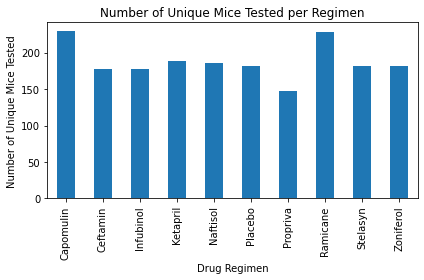

In [30]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
xAxis = mouseClean.groupby("Drug Regimen")
yAxis = xAxis['Mouse ID'].count()
regimen = yAxis.plot(kind = 'bar')
regimen.set_xlabel("Drug Regimen")
regimen.set_ylabel("Number of Unique Mice Tested")
plt.title("Number of Unique Mice Tested per Regimen")
plt.tight_layout()
plt.savefig("barplotPandas")
plt.show()

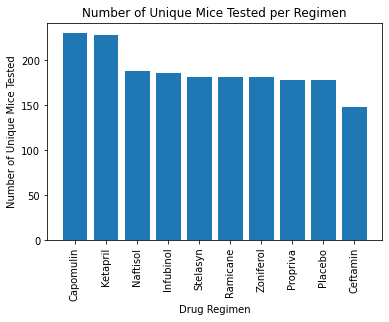

In [31]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
xAxis = np.arange(len(xAxis))
yAxis = mouseClean["Drug Regimen"].value_counts()
plt.bar(xAxis, yAxis)
tickMarks = [x for x in xAxis]
drugName = mouseClean["Drug Regimen"].unique()
plt.xticks(tickMarks, drugName, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.title("Number of Unique Mice Tested per Regimen")
plt.savefig("barplotMatplotlib")
plt.show()

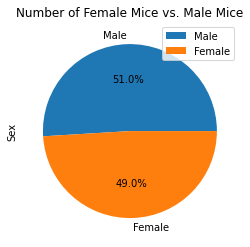

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderA = pd.DataFrame(mouseClean["Sex"].value_counts())
genderA.plot(y = "Sex", kind = "pie", autopct="%.1f%%", title = "Number of Female Mice vs. Male Mice")
plt.savefig("pieplotPandas")

<ipython-input-33-e2859d3fce57>:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(genderB, labels = dataLabels, autopct = "%1.1f%%")


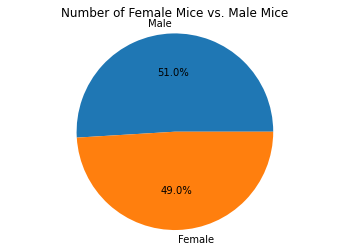

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genderB = pd.DataFrame(mouseClean["Sex"].value_counts())
dataLabels = genderB.index.values
plt.pie(genderB, labels = dataLabels, autopct = "%1.1f%%")
plt.title("Number of Female Mice vs. Male Mice")
plt.savefig("pieplotMatplotlib")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
#create data frame that holds last timepoint for each mouse, and mouse ID, reset index mouse id=column

maxTime = mouseClean.groupby(['Mouse ID'])['Timepoint'].max()
maxTime = maxTime.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

studyMerge = pd.merge(maxTime,mouseClean, on=['Mouse ID', 'Timepoint'], how='left')
studyMerge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = studyMerge.loc[studyMerge["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


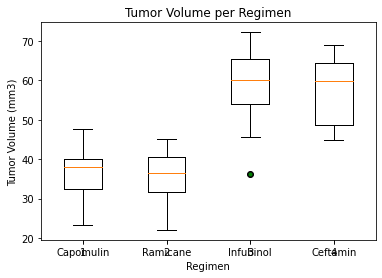

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = tumor_vol_list

fig, ax = plt.subplots()
ax.boxplot(tumor_vol_list)
plt.xticks([1, 2, 3, 4],['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.title("Tumor Volume per Regimen")
flierprops = dict(marker='o', markerfacecolor='g', markersize = 5)
plt.boxplot(data, flierprops = flierprops)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Regimen")
plt.show()

## Line and Scatter Plots

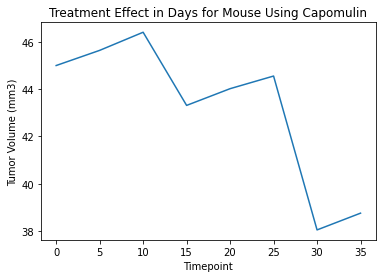

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulinMouse = mouseClean.loc[(mouseClean['Drug Regimen'] == 'Capomulin')]
capomulinMouse
j246 = capomulinMouse.loc[(capomulinMouse['Mouse ID'] == 'j246')]
j246

timepointcapomulinMouse = j246['Timepoint']
plt.plot(timepointcapomulinMouse, j246['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Treatment Effect in Days for Mouse Using Capomulin")
plt.show()

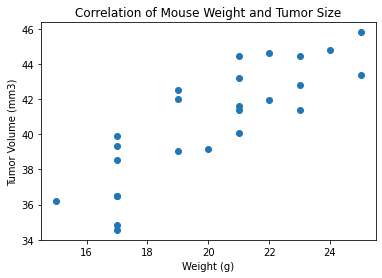

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cMouse = capomulinMouse.groupby('Mouse ID')
avg = cMouse.mean()
avgTumor = avg['Tumor Volume (mm3)']
x = avg['Weight (g)']
plt.scatter(x,avgTumor)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Correlation of Mouse Weight and Tumor Size")
plt.show()

## Correlation and Regression

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = avg['Weight (g)']
tumor_vol = avg['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84
